## CHEM 145 Python Lab 1C.

This module focuses on analysis of gas speeds, energies, interactions, and boiling temperatures. 

**TASK 1:** Work with the Maxwell-Boltzmann Speed Distribution for a gas. There are several sub tasks here. The outline cell, below, includes some additional instructions and guidance for how to do all of these things.
- Plot the Maxwell-Boltzmann speed distribution for H2 and N2 gases at a temperature of 150 K. Be sure to label your axes (including units) and also include a legend so we know which plot is which. It is probably good to input a bunch of useful paramters and then to create a function called MBSD or something similar that accepts an array of speeds v, the mass of the molecule of interest m, and the temperature T in Kelvins. When you make your plots, you need to decide on the range of the speed array, and it may be useful to have it go from a speed of 0 m/s to a speed twice or three times the most probable (peak) speed. You can figure out the most probable speed analytically using equations in the notes for the MBSD.
- The MBSD is normalized, meaning that the integrated area is 1. Check that this is true using numerical integration. To numerically integrate the function with respect to v, you will make a bunch of tiny boxes that approximate the function. A simple way to do this is to multiply the function's value at each of the sampled points in the array by the speed interval along the x axis so you have a bunch of boxes and to then add up the area of all the boxes. Since the interval between samples along the x-axis is constant for all boxes, finding the area under the curve is equivalent to summing the function's value at all points and then multiplying the sum by the speed interval along the x axis like this... np.sum(fv1)*(v[2]-v[1]). Print out a statement that "The integrated area of the MBSD for H2 at 150 K is XXX." and also "The integrated area of the MBSD for N2 at 150 K is YYY."
- To numerically calculate a property of a normalized distribution you can do an integral of that variable times the distribution. 
    - The mean speed is $v_{avg} = \int_0^\infty{f(v)vdv}$. Calculate the mean speed numerically for H2 and N2. Print out a statement indicating "The mean speed for H2 at 150 K is XXX m/s." and "The mean speed for N2 at 150 K is YYY m/s.".
    - The mean square speed is $v_{avg} = \int_0^\infty{f(v)v^2dv}$. Calculate the root mean square speed numerically for H2 and N2 (square root of the mean square speed). Print out a statement indicating "The RMS speed for H2 at 150 K is XXX m/s." and "The RMS speed for N2 at 150 K is YYY m/s."
- Use the function np.argmax to numerically calculate the peak speed for H2 and N2. Read about how the function works. Write a statement to print "The peak speed for H2 at 150 K is XXX m/s." and "The peak speed for N2 at 150 K is YYY m/s."
- For the mean speeds, root mean square speeds, and peak speeds, did your numerical calculations agree with the results you get when doing an analytical calcaulation from the equations we derived in class? Print a statement indicating "The numerical and analytical speeds matched." or "The numerical and analytical speeds did not match." But, if you do it right they should match. :)


Numerically calculated speeds for 150 K are below.
The mean average speed for N2 at 150 K is 4.3388657660191656e-10 m/s.
The mean average speed for H2 at 150 K is 1.6134205800225044e-09 m/s.
The VRMS speed for N2 at 150 K is 4.709413066250552e-10 m/s.
The VRMS speed for H2 at 150 K is 1.7507908724320105e-09 m/s.
The peak speed for N2 at 150 K is 3.8262228324982403e-10 m/s.
The peak speed for H2 at 150 K is 1.4316092171032741e-09 m/s.

The numerical and analytical speeds matched.


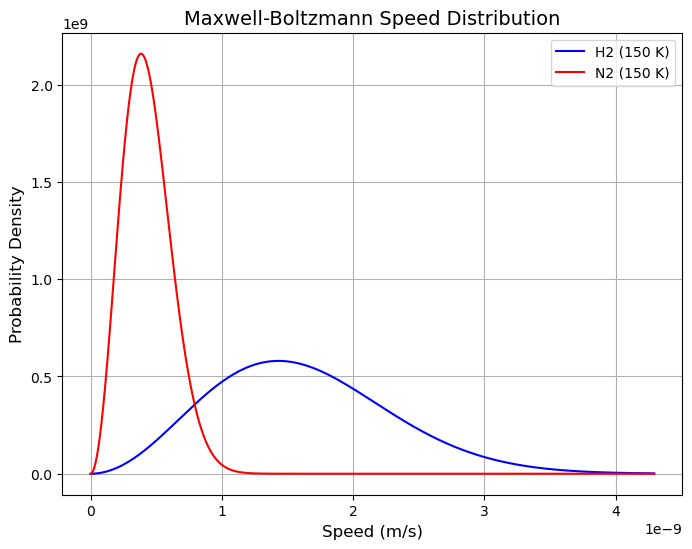

In [4]:
# these exercises are added GitHub on 01/03/2025

# Here is an outline for Task 1.
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt


# Parameters to be used later. A few examples are shown below. Be careful with your units.
R = 8.31            # Gas constant in J/(K*mol)
Na = 6.022e23       # Avogadro's number in /mol
# Number of moles of gas
# Pressure in Pa
kB = 1.38e-23 # Boltzmann constant, in SI units of J/K
T = 150 # Gas temperature in K 
# MW for N2 in kg/mol
m_N2 = 0.0280 # Mass of one N2 gas particle in kg
# MW for H2 in kg/mol
m_H2 = 0.00202 # Mass of one H2 gas particle in kg


# Define the Maxwell-Boltzmann Speed Distribution with a custom function called MBSD that accepts inputs v, m, T and returns the distribution of speeds.
def MBSD(v,m,T):
    return (m / (2 *np.pi * kB * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB * T))

# Define an array of speeds v with ~1000 points from 0 to 3x the RMS speed of the fastest molecule you will use. You will input v to MBSD.
v_max_N2 = np.sqrt (2 * kB * T / m_N2)
v_max_H2 = np.sqrt (2 * kB * T / m_H2)
v_range = np.linspace(0, 3 * max(v_max_H2, v_max_N2), 1000)


# Get the MBSD speed distributions. Create a distribution called fv1 for N2 and another called fv2 for H2.
fv1 = MBSD(v_range, m_N2, T)
fv2 = MBSD(v_range, m_H2, T)

# Check that fv1 and fv2 are normalized by numerically integrating fv1 and fv2. The probability should add up to 1. 
integral_N2 = np.sum(fv1) * (v_range[2] - v_range[1])
integral_H2 = np.sum(fv2) * (v_range[2] - v_range[1])

print("")  # This makes a blank line before the next group of print statements so you can read the outputs more easily.
print("Numerically calculated speeds for 150 K are below.")

# Calculate the mean average speed for N2 and H2 by numerical integration. Then write print statements to indicate the speeds for each.
mean_average_speed_N2 = np.sum(fv1 * v_range) * (v_range[2] - v_range[1])
mean_average_speed_H2 = np.sum(fv2 * v_range) * (v_range[2] - v_range[1])

print(f"The mean average speed for N2 at 150 K is {mean_average_speed_N2} m/s.")
print(f"The mean average speed for H2 at 150 K is {mean_average_speed_H2} m/s.")

# Numerically calculate the root mean-square speed for N2 and H2. Then write print statements to indicate the speeds for each.
mean_square_speed_N2 = np.sum(fv1 * v_range**2) * (v_range[2] - v_range[1])
mean_square_speed_H2 = np.sum(fv2 * v_range**2) * (v_range[2] - v_range[1])

vrms_speed_N2 = np.sqrt(mean_square_speed_N2)
vrms_speed_H2 = np.sqrt(mean_square_speed_H2)

print(f"The VRMS speed for N2 at 150 K is {vrms_speed_N2} m/s.")
print(f"The VRMS speed for H2 at 150 K is {vrms_speed_H2} m/s.")


# Numerically calculate the peak speed.
peak_speed_N2 = v_range[np.argmax(fv1)]
peak_speed_H2 = v_range[np.argmax(fv2)]

print(f"The peak speed for N2 at 150 K is {peak_speed_N2} m/s.")
print(f"The peak speed for H2 at 150 K is {peak_speed_H2} m/s.")


print("") # blank line for formatting
# Analytically calculate the various speeds from an equation (mean speeds of N2 and H2, RMS speeds of N2 and H2, Peak speeds of N2 and H2). 
mean_average_speed_analytical_N2 = np.sqrt(8 * kB * T / (np.pi * m_N2))
mean_average_speed_analytical_H2 = np.sqrt(8 * kB * T / (np.pi * m_H2))

vrms_speed_analytical_N2 = np.sqrt(3 * kB * T / m_N2)
vrms_speed_analytical_H2 = np.sqrt(3 * kB * T / m_H2)

peak_speed_analytical_N2 = np.sqrt(2 * kB * T / m_N2)
peak_speed_analytical_H2 = np.sqrt(2 * kB * T / m_H2)

# Write a print statement indicating whether the peak speeds match well or not.
if (np.isclose(mean_average_speed_H2, mean_average_speed_analytical_H2) and np.isclose(mean_average_speed_N2, mean_average_speed_analytical_N2) and
    np.isclose(vrms_speed_H2, vrms_speed_analytical_H2) and np.isclose(vrms_speed_N2, vrms_speed_analytical_N2) and
    np.isclose(peak_speed_H2, peak_speed_analytical_H2) and np.isclose(peak_speed_N2, peak_speed_analytical_N2)):
    print("The numerical and analytical speeds matched.")
else:
    print("The numerical and analytical speeds did not match.")

# Plot the speed distributions for N2 and H2 on a single plot with labeled axes, good font size, and include a legend.
plt.figure(figsize=(8, 6))
plt.plot(v_range, fv2, label="H2 (150 K)", color='blue')
plt.plot(v_range, fv1, label="N2 (150 K)", color='red')
plt.xlabel('Speed (m/s)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Maxwell-Boltzmann Speed Distribution', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

**TASK 2:** Create plots of gas compressibility vs pressure for the van der Waals gas equation of state for N2 gas at T=150K, 225K, 400K. Be sure to label your axes (including units) and also include a legend so we know which plot is which. There are lots of ways to do this, but here are some hints about one way. The cell below includes a few suggestions as well.
- It can be tricky with the vdW model to plug directly into $Z=\frac{PV}{nRT}$ since it isn't easy to get volume in terms of pressure. The instructions below are a way around this problem. 
- Define a vector of volumes V from 0.00004 to 0.01 with ~1000 points in it using np.linspace.
- Define a function called Pvdw that returns an array of vdW pressure values *P* when provided the array of volumes *V* and the values of *n*, *T*, *a*, *b*. (Look up the parameters *a* and *b* and be careful with units.) You can use n=1 mol if you like.
- Calculate gas compressibility *Z* by multiplying *P* from above by *V/nRT* where *V* are the corresponding volumes. Do this for each of the three temperatures and create an overlay plot for all three temperatures.
- Make your plot of *Z* vs *P* and set the y limits to be around 0,4 and the x-limits (pressure) to be around 0,10^8 Pa. Label your plot axes, including units if applicable.

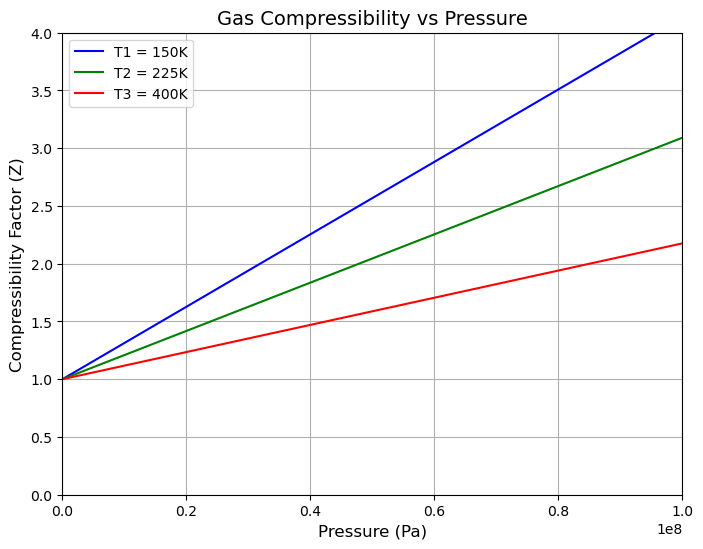

In [14]:
# Here is an outline for Task 2.
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Parameters to be used later.
R = 8.31
Na = 6.022e23
T1 = 150
T2 = 225
T3 = 400

a = 1.390 * 1e-5
b = 0.0391 * 1e-3

n = 1

# Create vector of volumes
V = np.linspace(0.00004, 0.01, 1000)


# Define custome function Pvdw to return pressure as a function of volume V.
def Pvdw(V, n, T, a, b):
    return (n * R * T) / (V - n * b) - (a * n**2) / V**2

# Calculate the compressibility here for N2 at the three temperatures.

P1 = Pvdw(V, n, T1, a, b)
P2 = Pvdw(V, n, T2, a, b)
P3 = Pvdw(V, n, T3, a, b)

def compress_factor(P, V, n, T):
    return P * V / (n * R * T)

Z1 = compress_factor(P1, V, n, T1)
Z2 = compress_factor(P2, V, n, T2)
Z3 = compress_factor(P3, V, n, T3)

# Plot MBSD and format axis labels, title, etc.
plt.figure(figsize=(8,6))
plt.plot(P1, Z1, label = 'T1 = 150K', color = 'blue')
plt.plot(P2, Z2, label = 'T2 = 225K', color = 'green')
plt.plot(P3, Z3, label = 'T3 = 400K', color = 'red')

plt.xlabel ('Pressure (Pa)', fontsize=12)
plt.ylabel ('Compressibility Factor (Z)', fontsize=12)
plt.title  ('Gas Compressibility vs Pressure', fontsize=14)
plt.yscale ('linear')
plt.xlim (0, 1e8)
plt.ylim (0, 4)
plt.legend (loc= 'best')
plt.grid (True)
plt.show()

**TASK 3:** Plot the Lennard-Jones potential for H2 and N2. Use y-limits of -2e-21,4e-21 J and x-limits of 0,8e-10 m. Be sure to label your axes (including units) and also include a legend so we know which plot is which.

Sample values of V_H2: [1.56391845e-19 1.48623103e-19 1.41257385e-19 1.34272560e-19
 1.27647786e-19]
Sample values of V_N2: [7.19328940e-18 6.85178806e-18 6.52765175e-18 6.21993627e-18
 5.92775211e-18]


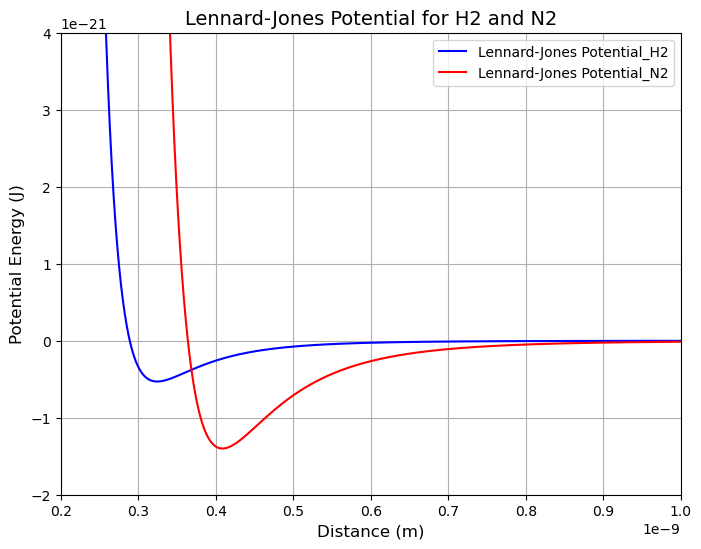

In [33]:
# Here is an outline for Task 3 in case helpful.
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters to be used later.
sigma_H2 = 2.89e-10
epsilon_H2 = 5.3e-22

sigma_N2 = 3.64e-10
epsilon_N2 = 1.4e-21

# Create array of distances R
R = np.linspace(2e-10, 1e-9, 1000)

# Define custom function LJ that returns the Lennard-Jones potential when given an array of distances R and the parameters s, ep (for sigma and epsilon).
def LJ (R, sigma, epsilon):
    return 4 * epsilon * ((sigma / R)**12 - (sigma / R)**6)

V_H2 = LJ(R, sigma_H2, epsilon_H2)
V_N2 = LJ(R, sigma_N2, epsilon_N2)

print("Sample values of V_H2:", V_H2[:5])  # Print the first 5 values
print("Sample values of V_N2:", V_N2[:5])  # Print the first 5 values

# Plot, format axis labels, title, etc.
plt.figure(figsize = (8,6))
plt.plot(R, V_H2, label = 'Lennard-Jones Potential_H2', color= 'blue')
plt.plot(R, V_N2, label = 'Lennard-Jones Potential_N2', color= 'red')

plt.xlabel ('Distance (m)', fontsize=12)
plt.ylabel ('Potential Energy (J)', fontsize=12)
plt.title ('Lennard-Jones Potential for H2 and N2', fontsize=14)
plt.xlim(2e-10, 1e-9)
plt.ylim(-2e-21, 4e-21)
plt.legend(loc='best')
plt.grid(True)
plt.show()


**TASK 4:** The (gas-liquid) critical point is a pressure, temperature point above which there ceases to be a distinction between liquids and gases. Above the critical point pressure and temperature, the substance will fill its container like a gas but can have a high density like a liquid. Most introductory chemistry courses merely point out that there is such a thing as a liquid-gas critical point or that super-critical fluids (like supercritical CO2) can be useful for a range of chemical processes like decaffeination. Guess what? We already have a nice equation that can give you the critical point--that's right, your old friend the van der Waals model of a nonideal gas!

The plot below shows pressure vs volume plots at constant temperature (these are called **isotherms**) with the vdW model for N2. If you look closely, you can see that the bottom plots have some wiggles (from left to right, a curve goes down then up, then down again) and the upper plots don't (from left to right, they just go down) and that somewhere in between there is a transition between those two regimes. That transition occurs at the critical temperature. Below the critical temperature, these wiggles are interpreted as indicating that there can be coexistence of a liquid and a gas just like how we draw the situation on our P vs T phase diagrams. Sometimes scientists sort of draw a straight line across the wiggly part to indicate the phase transition since the wiggles themselves aren't meaningful, but we won't need to worry about that here.

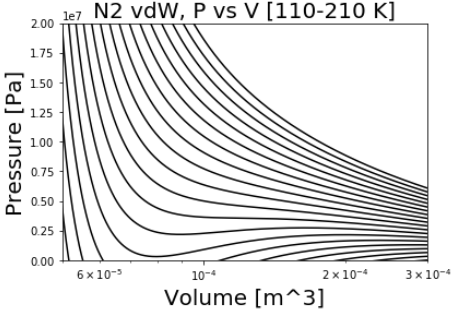

In this task you have to do something on a separate page (e.g., with a pencil and paper) and then you have to do some coding. Submit both. 

**Task 4a** On a separate paper that you are to scan and submit as a PDF with this assignment, do the following. First Recognize that the critical temperature is the temperature where oscillations are just starting. The isotherm that shows this will have at Tc a slope of zero, with $\frac{dP}{dV} = 0$. At the same time, when the wiggles are just starting there is also an "inflection point" where the curve goes from concave up to concave down, meaning that at Tc the second derivative will also be zero, with $\frac{d^2P}{dV^2}=0$. Your job is to derive the value of Tc. Here are instructions. 
- Take the derivative of the vdW equation $P=\frac{nRT}{V-nb}-a\frac{n^2}{V^2}$ with respect to volume and set it equal to zero.
- Take the second derivative of the vdW equation with respect to volume and also set it equal to zero.
- Solve those two equations to find the value of Vc... you should get $V_c=3nb$. 
- Substitute your value of $V_c$ into the equation you got from $\frac{dP}{dV} = 0$ and then you can solve for $T_c$. You should get $T_c=\frac{8a}{27bR}$.

**Task 4b** For your coding assignment, do the following. Things will probably be easier if you are careful to use SI units for everything including the vdW constants. That means it will be easier to use units of m, Kg, mol, K, Pa, N, J, etc., rather than g, atm, etc.
- Create a function that can return a set of pressures based on the vdW gas model when given a 1-D array of volumes, a temperature, and the vdW a, b parameters.
- Choose 1 mole of Xenon gas. Find the a and b vdW paramters for Xenon and enter them. Then create an array of volumes with ~1000 points that go from approximately 0.0001 m^3 to 0.0005 m^3. For yourself (don't need to show for your submitted assignment) just check that you can use your function to plot vdW pressure vs volume for a temperature of interest. For this, you could choose your analytical value of Tc if you wish.
- Next, create a plot like the one in this markdown cell, but for the gas Xe. It should include few isotherms with temperatures below the critical temperature and a few with temperatures above the critical temperature. A nice way to do this is to create a loop that will plot the vdW isotherm where each iteration of the loop uses a different temperature. I used 11 tempeartures in my plot, above, for N2, over the range 110-210 K. I used a log-x plot where the x-axis is plotted logarithmically but the y-axis is plotted linearly, using the function np.semilogx, rather than our usual linear/linear plots created using np.plot, but this isn't essential.
- Choose the x-limits and y-limits of your plot to zoom in on a region roughly like the one I did that shows the transition of wiggles to no wiggles. The functions plt.xlim and plt.ylim are useful for this. I used plt.ylim(0, 2e7) and plt.xlim(5e-5, 3e-4) in my plot, but you will have to find appropriate limits for your plot. Also, be sure to label your x and y axes and indicate the units.
- Examine your plot to find the temperature at which the wiggles seem to disappear. Print out the following statement. "My analytical result predicted Tc = XXX K and inspecting a plot of the vdW isotherms provided an approximate value of Tc = YYY K."

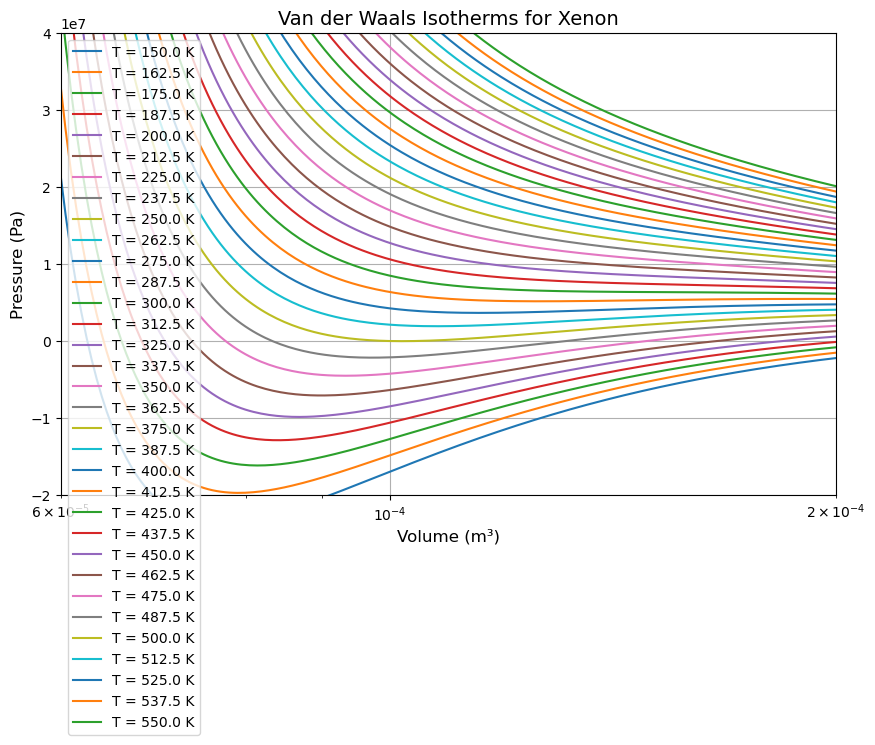

My analytical result predicted Tc = 290 K and inspecting a plot of the vdW isotherms provided an approximate value of Tc = 475 K.


In [21]:
# No outline for this one here. Good luck!

import numpy as np
import matplotlib.pyplot as plt

#Constants
a = 0.425
b = 0.00005105
R = 8.314

def vdW_pressure(volumes, temperature):
    return (R * temperature) / (volumes - b) - (a/volumes**2)

#array
volumes = np.linspace(1e-6, 5e-4, 1000)
temperature = 250


temperatures = np.linspace(150,550,33)

plt.figure(figsize= (10,6))

for temp in temperatures:
         pressures = vdW_pressure(volumes, temp)
         plt.semilogx(volumes, pressures, label= f'T = {temp} K')

plt.xlabel('Volume (m³)', fontsize=12)
plt.ylabel('Pressure (Pa)', fontsize=12)
plt.title('Van der Waals Isotherms for Xenon', fontsize=14)
plt.ylim (-2e7, 4e7)
plt.xlim (6e-5, 2e-4)
plt.legend()
plt.grid(True)
plt.show()


Tc_approx = 475 

Tc_analytical = 290
print(f"My analytical result predicted Tc = {Tc_analytical} K and inspecting a plot of the vdW isotherms provided an approximate value of Tc = {Tc_approx} K.")